# General Instructions to students:

1. There are 5 types of cells in this notebook. The cell type will be indicated within the cell.
    1. Markdown cells with problem written in it. (DO NOT TOUCH THESE CELLS) (**Cell type: TextRead**)
    2. Python cells with setup code for further evaluations. (DO NOT TOUCH THESE CELLS) (**Cell type: CodeRead**)
    3. Python code cells with some template code or empty cell. (FILL CODE IN THESE CELLS BASED ON INSTRUCTIONS IN CURRENT AND PREVIOUS CELLS) (**Cell type: CodeWrite**)
    4. Markdown cells where a written reasoning or conclusion is expected. (WRITE SENTENCES IN THESE CELLS) (**Cell type: TextWrite**)
    5. Temporary code cells for convenience and TAs. (YOU MAY DO WHAT YOU WILL WITH THESE CELLS, TAs WILL REPLACE WHATEVER YOU WRITE HERE WITH OFFICIAL EVALUATION CODE) (**Cell type: Convenience**)
    
2. You are not allowed to insert new cells in the submitted notebook.

3. You are not allowed to import any extra packages.

4. The code is to be written in Python 3.6 syntax. Latest versions of other packages maybe assumed.

5. In CodeWrite Cells, the only outputs to be given are plots asked in the question. Nothing else to be output/print. 

6. If TextWrite cells ask you to give accuracy/error/other numbers you can print them on the code cells, but remove the print statements before submitting.

7. The convenience code can be used to check the expected syntax of the functions. At a minimum, your entire notebook must run with "run all" with the convenience cells as it is. Any runtime failures on the submitted notebook as it is will get zero marks.

8. All code must be written by yourself. Copying from other students/material on the web is strictly prohibited. Any violations will result in zero marks.

9. All datasets will be given as .npz files, and will contain data in 4 numpy arrays :"X_train, Y_train, X_test, Y_test". In that order. The meaning of the 4 arrays can be easily inferred from their names.

10. All plots must be labelled properly, all tables must have rows and columns named properly.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier


# 1. Logistic Regression 

Write code for doing logistic regression below. Also write code for choosing best hyperparameters for each kernel type (use a part of training set as validation set).

Write code for running in the cell after (You may be asked to demonstrate your code during the viva using this cell.)

In text cell after that report the following numbers you get by running appropriate code.

Split the X_train, Y_train into train and validation based on an 80:20 split. For a given dataset, kernel parameter and regularisation value run gradient descent on the regularised kernel logistic loss on training set, with some learning rate eta. Try different etas, and choose the best eta (the eta that achieves the lowest R(alpha)), based on the alpha  you get after 1000 iterations.

For the classification data sets A and B, report the best kernel and regularisation parameters for the RBF kernel.  Choose the best kernel and regularisation parameter based on the accuracy of the model given by the optimisation procedure. Report the training and test zero-one error (or 1-accuracy) for those hyperparameters. 

For both  the synthetic classification datasets (dataset_A and dataset_B) in 2-dimensions, also illustrate the learned classifier. Do this in the last codeWrite cell for this question.



In [5]:
# CodeWrite 
#Write logistic regression code from scratch. Use gradient descent.
# Only write functions here

def compute_rbf_kernel (X, Y, gamma=1.0):
    """ Compute RBF Kernel of X and Y with kernel parameter 'gamma'
        Input X : (n x d) shape array
        Input Y : (m x d) shape array
        Return K : (n x m) shape array
    """
    K = np.zeros((X.shape[0], Y.shape[0]))
    for i, x in enumerate(X):
        for j, y in enumerate(Y):
            K[i, j] = np.exp(-gamma * (np.linalg.norm(x-y))**2)
    return K


def sigmoid_func (x):
    """ Return sigmoid of 'x' """
    return 1 / (1 + np.exp(-x))


# Count the no. of differences between array1 and array2
# diffarray(pred, Y_test) : array1 = pred, array2 = Y_test
# Return no. of mismatches between pred and Y_test
def diffarray_lr (array1, array2):
    count = 0
    for j in range(array2.shape[0]):
        if (array1[j] != array2[j]):
            count += 1
    return count


def train_pred_logistic_regression(X_train, Y_train, X_test, reg_param=1., kernel_param=1., eta=1., num_iter_gd=1000):
    """
    Arguments:
    X_train : (n,d) shape numpy array
    Y_train : (n,)  shape numpy array
    X_test : (m,d) shape numpy array
    eta : learning rate
    
    Returns the prediction of logistic regression :
    min sum{i=1 to n} log(1 + exp(-y_i * w.T * phi(x_i)) + (lambda/2) * ||w||^2
    where phi is the feature got by the kernel.
  
    The kernel is defined by the kernel_param:
    kernel=rbf:  K(u,v) = exp(-kernel_param*||u-v||^2)

    Returns:
    Y_test_pred: (m,) shape numpy array

    """
    n, d = X_train.shape
    m, _ = X_test.shape
   
    alpha = np.ones(n)
    K = compute_rbf_kernel (X_train, X_train, gamma=kernel_param)

    alpha_old = alpha_new = alpha
    for iteration in range(num_iter_gd):
        alpha_old = alpha_new
        sum = 0
        for i in range(n):
            a = (-1) * Y_train[i] * np.dot(alpha_old, K[:,i])
            b = (-1) * Y_train[i] * K[:,i]
            sum += sigmoid_func(a) * b
        grad_R_alpha = (sum / n) + (reg_param * np.dot(K, alpha_old))

        alpha_new = alpha_old - (eta * grad_R_alpha)  # Update alpha values
        
        count = 0
        for i in range(n):
            if (alpha_old[i] - alpha_new[i] >= 0):   # how many alphas decrease in the iteration
                count += 1
        # decrease in alpha values is less than 1% -- stop gradient descent
        if (count < n/100 and (iteration > 100 or iteration > 500)):
            break

    alpha = alpha_new

    K1 = compute_rbf_kernel (X_train, X_test, gamma=kernel_param)
    preds = []
    for j in range(m):
        sum = 0
        for i in range(n):
            sum += alpha[i] * K1[i, j]
        if (sigmoid_func(sum) - 0.5 >= 0):
            preds.append(1)
        else:
            preds.append(-1)
    
    Y_test_pred = np.array(preds)   
    return Y_test_pred



def return_best_hyperparam (X_train, Y_train):
    """
    Arguments:
    X_train : (n,d) shape numpy array
    Y_train : (n,)  shape numpy array
    
    kernel = 'rbf'  K(u,v) = exp(-kernel_param*||u-v||^2)

    Returns: reg_param, kernel_param, eta
    
    """
    part = int(X_train.shape[0] * 0.8)
    
    Xtrain = X_train[:part]
    Xvalid = X_train[part:]
    
    Ytrain = Y_train[:part]
    Yvalid = Y_train[part:]
    
    reg_param_list = [0.01, 0.1, 1.0, 2.0, 5.0]
    kernel_param_list = [0.01, 0.1, 1.0, 2.0, 3.0]
    eta_list = [0.001, 0.01, 0.1, 1]
    
    params = [(r, k, e) for r in reg_param_list for k in kernel_param_list for e in eta_list]
    for i, param in enumerate(params):
        r, k, e = param
        pred = train_pred_logistic_regression(Xtrain, Ytrain, Xvalid, reg_param=r, 
                                              kernel_param=k, eta = e, num_iter_gd=1000)
        error = diffarray_lr(pred, Yvalid)
        if (i == 0):
            reg_param = r
            kernel_param = k
            eta = e
            cerror = error
        if (i > 0 and error < cerror):
            reg_param = r
            kernel_param = k
            eta = e
            cerror = error                
    return reg_param, kernel_param, eta



In [6]:
# CodeWrite : Use the functions above to get the numbers you report below. 

dataset_list = ['dataset_A.npz','dataset_B.npz']

for i in range(len(dataset_list)):
    dataset  = np.load(dataset_list[i])
    d_Xtrain = dataset.f.arr_0
    d_Ytrain = dataset.f.arr_1
    d_Xtest  = dataset.f.arr_2
    d_Ytest  = dataset.f.arr_3
    #print(d_Xtrain.shape, d_Ytrain.shape, d_Xtest.shape, d_Ytest.shape)
    
    rparam, kparam, eparam = return_best_hyperparam (d_Xtrain, d_Ytrain)
    
    print("Dataset : ", dataset_list[i], ",  Kernel : rbf")
    print("Best reg_param : ", rparam,   ", kernel_param : ", kparam, ", lr_rate(eta) : ", eparam)
    
    Y_train_pred = train_pred_logistic_regression(d_Xtrain, d_Ytrain, d_Xtrain, reg_param = rparam,
                                                  kernel_param = kparam, eta = eparam, num_iter_gd=1000)
    print("Train Error = ", diffarray_lr(Y_train_pred, d_Ytrain))
    
    Y_test_pred = train_pred_logistic_regression(d_Xtrain, d_Ytrain, d_Xtest, reg_param = rparam,
                                                  kernel_param = kparam, eta = eparam, num_iter_gd=1000)
    print("Test Error = ", diffarray_lr(Y_test_pred, d_Ytest))
        
    print("----------------------------------------")

C:\Users\palpr\Anaconda3\lib\site-packages\ipykernel_launcher.py:69: RuntimeWarning: invalid value encountered in subtract
C:\Users\palpr\Anaconda3\lib\site-packages\ipykernel_launcher.py:86: RuntimeWarning: overflow encountered in double_scalars
C:\Users\palpr\Anaconda3\lib\site-packages\ipykernel_launcher.py:67: RuntimeWarning: overflow encountered in multiply


Dataset :  dataset_A.npz ,  Kernel : rbf
Best reg_param :  0.01 , kernel_param :  3.0 , lr_rate(eta) :  0.1
Train Error =  13
Test Error =  6
----------------------------------------
Dataset :  dataset_B.npz ,  Kernel : rbf
Best reg_param :  1.0 , kernel_param :  2.0 , lr_rate(eta) :  0.001
Train Error =  276
Test Error =  99
----------------------------------------


TextWrite Cell: Give your observations and the list of hyperparameter choices and train zero-one error  and test zero-one error for all three kernel choices, for all 4 datasets (2 real world and 2 synthetic).  

#### Train 0-1 Error and Test 0-1 Error using best hyperparameter choices and learning rate on two Synthetic Datasets 

* **Dataset dataset_A.npz:** &nbsp;Xtrain (1500, 2) &nbsp;&nbsp;Ytrain (1500,) &nbsp;Xtest (500, 2) &nbsp;&nbsp;Ytest (500,)
* **Dataset dataset_B.npz:** &nbsp;Xtrain (1500, 2) &nbsp;&nbsp;Ytrain (1500,) &nbsp;Xtest (500, 2) &nbsp;&nbsp;Ytest (500,)

|kernel=rbf|reg_param|kernel_param|lr_rate(eta)|Train-error|Test-error|
|----------|---------|------------|---|-----------|-----------|
|dataset_A.npz|0.01|3.0|0.1|13|6|
|dataset_B.npz|1.0|2.0|0.001|276|99|



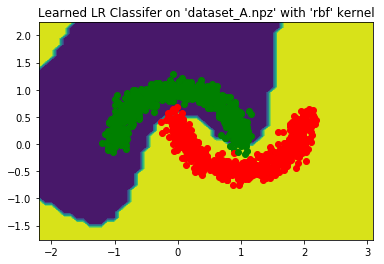

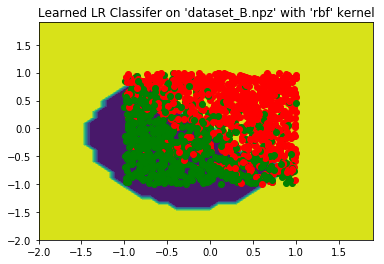

In [7]:
# Codewrite cell: Generate plots of learned classifier for all three kernel types, on dataset_A and datasset_B.
# Plots should give both the learned classifier and the train data. 
# Similar to  Bishop Figure 4.5 (with just two classes here.)
# Total number of plots = 3 * 2 = 6

def train_pred_logistic_regression_plot (X_train, Y_train, X_test, K, K1, 
                                         reg_param=1., kernel_param=1., eta=1., num_iter_gd=1000):
    """
    Arguments:
    X_train : (n,d) shape numpy array
    Y_train : (n,)  shape numpy array
    X_test : (m,d) shape numpy array
    K : Kernel matrix (X_train x X_train) of dimension n x n
    K1 : Kernel Matrix (X_train x X_test) of dimension n x m
    
    Returns the prediction of logistic regression :
    min sum{i=1 to n} log(1 + exp(-y_i * w.T * phi(x_i)) + (lambda/2) * ||w||^2
    where phi is the feature got by the kernel.
    
    
    The kernel is defined by the kernel_param:
    kernel=rbf:  K(u,v) = exp(-kernel_param*||u-v||^2)

    Returns:
    Y_test_pred: (m,) shape numpy array

    """
    n, d = X_train.shape
    m, _ = X_test.shape
   
    alpha = np.ones(n)
    #K = compute_rbf_kernel (X_train, X_train, gamma=kernel_param)

    alpha_old = alpha_new = alpha
    for iteration in range(num_iter_gd):
        alpha_old = alpha_new
        sum = 0
        for i in range(n):
            a = (-1) * Y_train[i] * np.dot(alpha_old, K[:,i])
            b = (-1) * Y_train[i] * K[:,i]
            sum += sigmoid_func(a) * b
        grad_R_alpha = (sum / n) + (reg_param * np.dot(K, alpha_old))

        alpha_new = alpha_old - (eta * grad_R_alpha)  # Update alpha values
        
        count = 0
        for i in range(n):
            if (alpha_old[i] - alpha_new[i] >= 0):   # how many alphas decrease in the iteration
                count += 1
        # decrease in alpha values is less than 1% -- stop gradient descent
        if (count < n/100 and (iteration > 100 or iteration > 500)):
            break

    alpha = alpha_new

    #K1 = compute_rbf_kernel (X_train, X_test, gamma=kernel_param)
    preds = []
    for j in range(m):
        sum = 0
        for i in range(n):
            sum += alpha[i] * K1[i, j]
        if (sigmoid_func(sum) - 0.5 >= 0):
            preds.append(1)
        else:
            preds.append(-1)
    
    Y_test_pred = np.array(preds)   
    return Y_test_pred


dataset_list = ['dataset_A.npz','dataset_B.npz']

for i in range(len(dataset_list)):
    dataset  = np.load(dataset_list[i])
    d_Xtrain = dataset.f.arr_0
    d_Ytrain = dataset.f.arr_1
    d_Xtest  = dataset.f.arr_2
    d_Ytest  = dataset.f.arr_3
    
    if (dataset_list[i] == 'dataset_A.npz'):      
        X0, X1 = d_Xtrain[:,0], d_Xtrain[:,1]
        x0_min, x0_max = X0.min() - 1, X0.max() + 1
        x1_min, x1_max = X1.min() - 1, X1.max() + 1
        
        x0, x1 = np.meshgrid(np.arange(x0_min, x0_max, .1), np.arange(x1_min, x1_max, .1))
        #print(np.c_[x0.ravel(), x1.ravel()].shape)
        
        Xtest = np.c_[x0.ravel(), x1.ravel()]
        K = compute_rbf_kernel (d_Xtrain, d_Xtrain, gamma=3.0)
        K1 = compute_rbf_kernel (d_Xtrain, Xtest, gamma=3.0)
        Xtest_pred = train_pred_logistic_regression_plot(d_Xtrain, d_Ytrain, Xtest, K, K1, reg_param = 0.01,
                                                      kernel_param = 3.0, eta = 0.1, num_iter_gd=1000)
        Z = Xtest_pred
        Z = Z.reshape(x0.shape)
        plt.figure()
        plt.contourf(x0, x1, Z)
        for j in range(d_Ytrain.shape[0]):
            if (d_Ytrain[j] > 0):
                plt.scatter(d_Xtrain[j,0], d_Xtrain[j,1], c='red')  # positive class = red
            else:
                plt.scatter(d_Xtrain[j,0], d_Xtrain[j,1], c='green')  # negative class = green
        #plt.scatter(d_Xtrain[:,0], d_Xtrain[:,1])
        plt.title("Learned LR Classifer on \'dataset_A.npz\' with \'rbf\' kernel")

    if (dataset_list[i] == 'dataset_B.npz'):
        X0, X1 = d_Xtrain[:,0], d_Xtrain[:,1]
        x0_min, x0_max = X0.min() - 1, X0.max() + 1
        x1_min, x1_max = X1.min() - 1, X1.max() + 1
        
        x0, x1 = np.meshgrid(np.arange(x0_min, x0_max, .1), np.arange(x1_min, x1_max, .1))
        #print(np.c_[x0.ravel(), x1.ravel()].shape)
             
        Xtest = np.c_[x0.ravel(), x1.ravel()]
        K = compute_rbf_kernel (d_Xtrain, d_Xtrain, gamma=2.0)
        K1 = compute_rbf_kernel (d_Xtrain, Xtest, gamma=2.0)
        Xtest_pred = train_pred_logistic_regression_plot(d_Xtrain, d_Ytrain, Xtest, K, K1, reg_param = 1.0,
                                                      kernel_param = 2.0, eta = 0.001, num_iter_gd=1000)
        Z = Xtest_pred
        Z = Z.reshape(x0.shape)
        plt.figure()
        plt.contourf(x0, x1, Z)
        for j in range(d_Ytrain.shape[0]):
            if (d_Ytrain[j] > 0):
                plt.scatter(d_Xtrain[j,0], d_Xtrain[j,1], c='red')  # positive class = red
            else:
                plt.scatter(d_Xtrain[j,0], d_Xtrain[j,1], c='green')  # positive class = green
        #plt.scatter(d_Xtrain[:,0], d_Xtrain[:,1])
        plt.title("Learned LR Classifer on \'dataset_B.npz\' with \'rbf\' kernel")


# 2. SVM

Write code for learning SVM below. Also write code for choosing best hyperparameters for each kernel type. You may use sklearn.svm for this purpose. (use a part of training set as validation set)

Write code for running in the cell after (You may be asked to demonstrate your code during the via using this cell.)

In text cell after that report the following numbers you get by running appropriate code:

For each classification data set (dataset A,B,C,D) report the best kernel and regularisation parameters for linear, RBF and Poly kernels. (Linear has no kernel parameter.) Report the training and test zero-one error for those hyperparameters.

For the synthetic classification datasets in 2-dimensions, also illustrate the learned classifier for each kernel setting. Do this in the last codeWrite cell for this question.

In [2]:
# CodeWrite cell
# Write SVM classifier using SKlearn, write code for choosing best hyper parameters.
# write only functions here

def SVM_Classifer (X_train, Y_train, X_test, kerneltype='linear', reg_param=1., kernel_param=1., maxiterations=-1):
    """
    Arguments:
    X_train : (n,d) shape numpy array
    Y_train : (n,)  shape numpy array
    X_test : (m,d) shape numpy array
    kerneltype = 'linear' or 'poly' or 'rbf'
    reg_param = C (Penalty parameter for error term)

    kerneltype = linear: K(u,v) = u.T * v  --> no kernel_param
    kerneltype = poly:  K(u,v) = (1 + u.T * v)^(kernel_param) --> coef0 = 1 and degree = kernel_param
    kerneltype = rbf:  K(u,v) = exp(-kernel_param*||u-v||^2) --> gamma = kernel_param

    Returns:
    Y_test_pred: (m,) shape numpy array
    
    """
    if (kerneltype == 'linear'):
        clf = SVC(C = reg_param, kernel='linear', 
                  cache_size = 1000., max_iter = maxiterations)
        
    if (kerneltype == 'poly'):
        clf = SVC(C = reg_param, kernel='poly', coef0 = 1, degree = kernel_param, gamma = 'auto',
                  cache_size = 1000., max_iter = maxiterations)
        
    if (kerneltype == 'rbf'):
        clf = SVC(C = reg_param, kernel='rbf', gamma = kernel_param, 
                  cache_size = 1000., max_iter = maxiterations)
        
    clf.fit(X_train, Y_train)
    Y_test_pred = clf.predict(X_test)
    return Y_test_pred



# Count the no. of differences between array1 and array2
# diffarray(pred, Y_test) : array1 = pred, array2 = Y_test
# Return no. of mismatches between pred and Y_test
def diffarray (array1, array2):
    count = 0
    for j in range(array2.shape[0]):
        if (array1[j] != array2[j]):
            count += 1
    return count



def return_best_hyperparam (X_train, Y_train, kerneltype, iterations):
    """
    Arguments:
    X_train : (n,d) shape numpy array
    Y_train : (n,)  shape numpy array
    kerneltype = 'linear' or 'poly' or 'rbf'

    Returns: reg_param, kernel_param
    
    """
    part = int(X_train.shape[0] * 0.8)
    
    Xtrain = X_train[:part]
    Xvalid = X_train[part:]
    
    Ytrain = Y_train[:part]
    Yvalid = Y_train[part:]
    
    C = [1., 2., 5., 10., 15., 20.]  # reg_param for all kernels
    degree = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]  # degree (kernel_param) for 'poly' kernel
    gamma = [0.001, 0.01, 0.1, 1.0, 2.0, 3.0, 4.0, 5.0]  # gamma (kernel_param) for 'rbf' kernel
    
    if (kerneltype == 'linear'):
        for i, c in enumerate(C):
            pred = SVM_Classifer(Xtrain, Ytrain, Xvalid, kerneltype='linear', reg_param=c, 
                                 maxiterations=iterations)
            error = diffarray(pred, Yvalid)
            if (i == 0):
                reg_param = c
                cerror = error
            if (i > 0 and error < cerror):
                reg_param = c 
                cerror = error
        kernel_param = 1.
        return reg_param, kernel_param
    
    if (kerneltype == 'poly'):
        params = [(c, d) for c in C for d in degree]
        for i, param in enumerate(params):
            c, d = param
            pred = SVM_Classifer(Xtrain, Ytrain, Xvalid, kerneltype='poly', reg_param=c, kernel_param=d,
                                maxiterations=iterations)
            error = diffarray(pred, Yvalid)
            if (i == 0):
                reg_param = c
                kernel_param = d
                cerror = error
            if (i > 0 and error < cerror):
                reg_param = c
                kernel_param = d
                cerror = error                
        return reg_param, kernel_param
    
    if (kerneltype == 'rbf'):
        params = [(c, g) for c in C for g in gamma]
        for i, param in enumerate(params):
            c, g = param
            pred = SVM_Classifer(Xtrain, Ytrain, Xvalid, kerneltype='poly', reg_param=c, kernel_param=g,
                                maxiterations=iterations)
            error = diffarray(pred, Yvalid)
            if (i == 0):
                reg_param = c
                kernel_param = g
                cerror = error
            if (i > 0 and error < cerror):
                reg_param = c
                kernel_param = g
                cerror = error                
        return reg_param, kernel_param            


In [3]:
# CodeWrite cell
# Write code here for generating the numbers that you report below.

dataset_list = ['dataset_A.npz','dataset_B.npz','dataset_C.npz','dataset_D.npz']
kernel_list = ['linear', 'poly', 'rbf']

for i in range(len(dataset_list)):
    dataset  = np.load(dataset_list[i])
    d_Xtrain = dataset.f.arr_0
    d_Ytrain = dataset.f.arr_1
    d_Xtest  = dataset.f.arr_2
    d_Ytest  = dataset.f.arr_3
    #print(d_Xtrain.shape, d_Ytrain.shape, d_Xtest.shape, d_Ytest.shape)
    
    if (dataset_list[i] == 'dataset_D.npz'):
        iteration = 10000
    else:
        iteration = -1
    
    for k in range(len(kernel_list)):
        
        rparam, kparam = return_best_hyperparam (d_Xtrain, d_Ytrain, kerneltype=kernel_list[k], iterations=iteration)
        print("Dataset : ", dataset_list[i], ",  Kernel : ", kernel_list[k])
        print("Max. Iterations (default -1) : ", iteration)
        print("Best reg_param : ", rparam,   ", kernel_param : ", kparam)
    
        Y_train_pred = SVM_Classifer(d_Xtrain, d_Ytrain, d_Xtrain, kerneltype=kernel_list[k], reg_param=rparam,
                                     kernel_param=kparam, maxiterations = iteration)
        print("Train Error = ", diffarray(Y_train_pred, d_Ytrain))    
    
        Y_test_pred = SVM_Classifer(d_Xtrain, d_Ytrain, d_Xtest, kerneltype=kernel_list[k], reg_param=rparam, 
                                    kernel_param=kparam, maxiterations = iteration)
        print("Test Error = ", diffarray(Y_test_pred, d_Ytest))
        
    print("----------------------------------------")

Dataset :  dataset_A.npz ,  Kernel :  linear
Max. Iterations (default -1) :  -1
Best reg_param :  15.0 , kernel_param :  1.0
Train Error =  175
Test Error =  62
Dataset :  dataset_A.npz ,  Kernel :  poly
Max. Iterations (default -1) :  -1
Best reg_param :  1.0 , kernel_param :  7
Train Error =  1
Test Error =  1
Dataset :  dataset_A.npz ,  Kernel :  rbf
Max. Iterations (default -1) :  -1
Best reg_param :  5.0 , kernel_param :  4.0
Train Error =  1
Test Error =  1
----------------------------------------
Dataset :  dataset_B.npz ,  Kernel :  linear
Max. Iterations (default -1) :  -1
Best reg_param :  1.0 , kernel_param :  1.0
Train Error =  272
Test Error =  93
Dataset :  dataset_B.npz ,  Kernel :  poly
Max. Iterations (default -1) :  -1
Best reg_param :  1.0 , kernel_param :  8
Train Error =  267
Test Error =  92
Dataset :  dataset_B.npz ,  Kernel :  rbf
Max. Iterations (default -1) :  -1
Best reg_param :  2.0 , kernel_param :  3.0
Train Error =  269
Test Error =  91
------------------

C:\Users\palpr\Anaconda3\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\palpr\Anaconda3\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\palpr\Anaconda3\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\palpr\Anaconda3\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\palpr\Anaconda3\lib\site-pa

Dataset :  dataset_D.npz ,  Kernel :  linear
Max. Iterations (default -1) :  10000
Best reg_param :  2.0 , kernel_param :  1.0
Train Error =  28
Test Error =  8


C:\Users\palpr\Anaconda3\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\palpr\Anaconda3\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\palpr\Anaconda3\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\palpr\Anaconda3\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\palpr\Anaconda3\lib\site-pa

C:\Users\palpr\Anaconda3\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\palpr\Anaconda3\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\palpr\Anaconda3\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\palpr\Anaconda3\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\palpr\Anaconda3\lib\site-pa

Dataset :  dataset_D.npz ,  Kernel :  poly
Max. Iterations (default -1) :  10000
Best reg_param :  2.0 , kernel_param :  1
Train Error =  26
Test Error =  6


C:\Users\palpr\Anaconda3\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\palpr\Anaconda3\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\palpr\Anaconda3\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\palpr\Anaconda3\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\palpr\Anaconda3\lib\site-pa

Dataset :  dataset_D.npz ,  Kernel :  rbf
Max. Iterations (default -1) :  10000
Best reg_param :  2.0 , kernel_param :  1.0
Train Error =  0
Test Error =  39
----------------------------------------


TextWrite Cell: Give your observations and the list of hyperparameter choices and train zero-one error  and test zero-one error for all three kernel choices, for all 4 datasets (2 real world and 2 synthetic).  

* **Dataset dataset_A.npz:** &nbsp;Xtrain (1500, 2) &nbsp;&nbsp;Ytrain (1500,) &nbsp;Xtest (500, 2) &nbsp;&nbsp;Ytest (500,)
* **Dataset dataset_B.npz:** &nbsp;Xtrain (1500, 2) &nbsp;&nbsp;Ytrain (1500,) &nbsp;Xtest (500, 2) &nbsp;&nbsp;Ytest (500,)
* **Dataset dataset_C.npz:** &nbsp;Xtrain (1500, 64)&nbsp;Ytrain (1500,) &nbsp;Xtest (297, 64) Ytest (297,)
* **Dataset dataset_D.npz:** &nbsp;Xtrain (400, 30) &nbsp;&nbsp;Ytrain (400,) &nbsp;&nbsp;&nbsp;Xtest (169, 30) Ytest (169,)

#### Best Regularization Parameter and Kernel Parameter choices for all three Kernels on all four Datasets

|kernel|linear|poly|rbf|
|-------------|------------|------------|------------|
|dataset_A.npz|reg_param=15.0|reg_param=1.0, kernel_param=7|reg_param=5.0, kernel_param=4.0|
|dataset_B.npz|reg_param=1.0|reg_param=1.0, kernel_param=8|reg_param=2.0, kernel_param=3.0|
|dataset_C.npz|reg_param=10.0|reg_param=1.0, kernel_param=4|reg_param=1.0, kernel_param=4.0|
|dataset_D.npz|reg_param=2.0|reg_param=2.0, kernel_param=1|reg_param=2.0, kernel_param=1.0|


#### Train 0-1 Error and Test 0-1 Error using above hyperparameters for all three Kernels on all four Datasets 

|kernel|linear|poly|rbf|
|--------------------|-----------------|------------------|------------------|
|dataset_A.npz|Train-Error=175, Test-Error=62|Train-Error=1, Test-Error=1|Train-Error=1, Test-Error=1|
|dataset_B.npz|Train-Error=272, Test-Error=93|Train-Error=267, Test-Error=92|Train-Error=269, Test-Error=91|
|dataset_C.npz|Train-Error=94, Test-Error=31|Train-Error=0, Test-Error=11|Train-Error=0, Test-Error=145|
|dataset_D.npz|Train-Error=28, Test-Error=8|Train-Error=26, Test-Error=6|Train-Error=0, Test-Error=39|

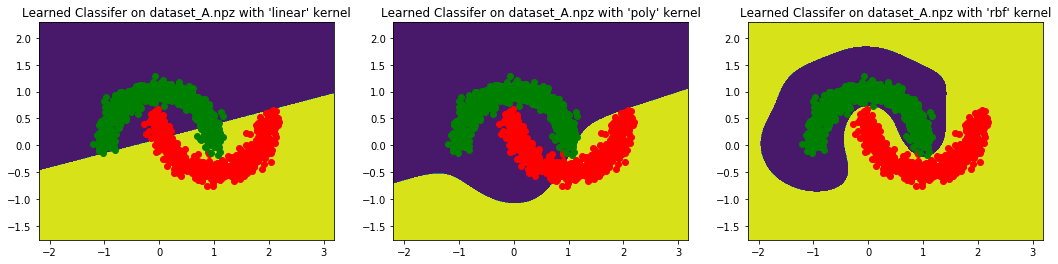

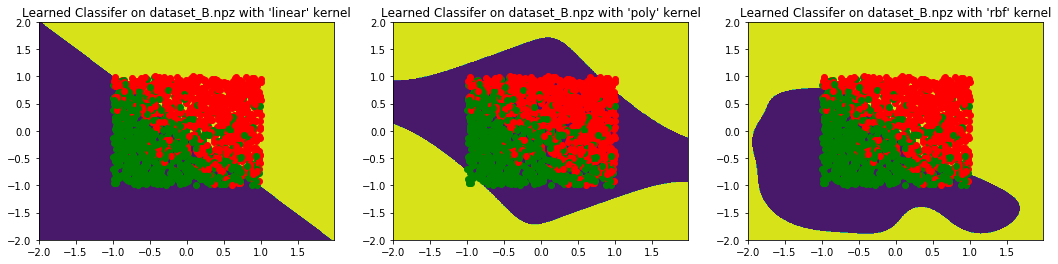

In [4]:
# Codewrite cell: Generate plots of learned classifier for all three kernel types, on dataset_A and datasset_B.
# Plots should give both the learned classifier and the train data. 
# Similar to  Bishop Figure 4.5 (with just two classes here.)
# Total number of plots = 3 * 2 = 6

def visualize_svc_2d (Xtrain, Ytrain, clf, title=""):   
    X0, X1 = Xtrain[:,0], Xtrain[:,1]
    
    x0_min, x0_max = X0.min() - 1, X0.max() + 1
    x1_min, x1_max = X1.min() - 1, X1.max() + 1
    x0, x1 = np.meshgrid(np.arange(x0_min, x0_max, .01), np.arange(x1_min, x1_max, .01))
    
    Z = clf.predict(np.c_[x0.ravel(), x1.ravel()])
    Z = Z.reshape(x0.shape)
    plt.contourf(x0, x1, Z)
    for i in range(Ytrain.shape[0]):
        if (Ytrain[i] > 0):
            plt.scatter(Xtrain[i,0], Xtrain[i,1], c='red')    # positive class = red
        else:
            plt.scatter(Xtrain[i,0], Xtrain[i,1], c='green')   # negative class = green
    #plt.scatter(Xtrain[:,0], Xtrain[:,1])
    plt.title(title)



dataset_list = ['dataset_A.npz','dataset_B.npz']

for i in range(len(dataset_list)):
    dataset  = np.load(dataset_list[i])
    d_Xtrain = dataset.f.arr_0
    d_Ytrain = dataset.f.arr_1
    d_Xtest  = dataset.f.arr_2
    d_Ytest  = dataset.f.arr_3
    
    if (dataset_list[i] == 'dataset_A.npz'):
        plt.figure(figsize=(18, 4))
            
        clf = SVC(C = 15.0, kernel='linear')
        clf.fit(d_Xtrain, d_Ytrain)
        plt.subplot(1, 3, 1)
        title = "Learned Classifer on " + dataset_list[i] + " with \'linear\' kernel"
        visualize_svc_2d (d_Xtrain, d_Ytrain, clf, title)

        clf = SVC(C = 1.0, kernel='poly', degree = 7, gamma = 'auto')
        clf.fit(d_Xtrain, d_Ytrain)
        plt.subplot(1, 3, 2)
        title = "Learned Classifer on " + dataset_list[i] + " with \'poly\' kernel"
        visualize_svc_2d (d_Xtrain, d_Ytrain, clf, title)

        clf = SVC(C = 5.0, kernel='rbf', gamma = 4.0)
        clf.fit(d_Xtrain, d_Ytrain)
        plt.subplot(1, 3, 3)
        title = "Learned Classifer on " + dataset_list[i] + " with \'rbf\' kernel"
        visualize_svc_2d (d_Xtrain, d_Ytrain, clf, title)

    if (dataset_list[i] == 'dataset_B.npz'):
        plt.figure(figsize=(18, 4))
            
        clf = SVC(C = 1.0, kernel='linear')
        clf.fit(d_Xtrain, d_Ytrain)
        plt.subplot(1, 3, 1)
        title = "Learned Classifer on " + dataset_list[i] + " with \'linear\' kernel"
        visualize_svc_2d (d_Xtrain, d_Ytrain, clf, title)

        clf = SVC(C = 1.0, kernel='poly', degree = 8, gamma = 'auto')
        clf.fit(d_Xtrain, d_Ytrain)
        plt.subplot(1, 3, 2)
        title = "Learned Classifer on " + dataset_list[i] + " with \'poly\' kernel"
        visualize_svc_2d (d_Xtrain, d_Ytrain, clf, title)

        clf = SVC(C = 2.0, kernel='rbf', gamma = 3.0)
        clf.fit(d_Xtrain, d_Ytrain)
        plt.subplot(1, 3, 3)
        title = "Learned Classifer on " + dataset_list[i] + " with \'rbf\' kernel"
        visualize_svc_2d (d_Xtrain, d_Ytrain, clf, title)



# 3. Decision Tree

Write code for learning decision tree below. Take as an argument a hyperparameter on what size node to stop splitting. Choose the number of training points at which you stop splitting the node further between 1,10 and 50. You are NOT allowed to use sklearn modules for this.)

Write code for running in the cell after (You may be asked to demonstrate your code during the viva using this cell.)

In text cell after that report the following numbers you get by running appropriate code:

For the classification data sets A and B report the best node size to stop splitting. Report the training and test zero-one error for those hyperparameters.

Also illustrate the learned classifier. Do this in the last codeWrite cell for this question.

Important: Think about how you will represent a decision tree. (Possible soln: Store as a list of tuples containing node position, attribute to split, threshold, class to classifiy (if leaf node) )


In [2]:
# CodeWrite cell
# Write Decision tree classifier from scratch, write code for choosing best node size to stop splitting.
# write only functions here
       
def construct_tree(dataX, dataY,nodeCount,number_of_nodes_in_leaf_node):
    #print("best_node*********************************************************",len(dataX))
    count_plus = 0
    count_minus = 0
    if len(dataX) != 0:
        for classData in dataY:
            if classData == -1:
                count_minus = count_minus + 1
            else:
                count_plus = count_plus + 1
        if count_plus == 0:
            node[nodeCount] = (None,None,None,-1, None)
            return
        elif count_minus == 0:
            node[nodeCount] = (None,None,None,+1,None)
            return
         
  
    if len(dataX)<=number_of_nodes_in_leaf_node  or len(dataX)==0:
    #         print(\"best_node*********************************************************\",nodeCount,dataX)
            count_plus = 0
            count_minus = 0
            for classData in dataY:
                if classData == -1:
                    count_minus = count_minus + 1
                else:
                    count_plus = count_plus + 1
            if count_plus>=count_minus:
                node[nodeCount] = (None,None,None,+1, None)
            else:
                node[nodeCount] = (None,None,None,-1,None)
            return 
    else:  
        
            #print(\"in else\",dataX,dataY)\n",
            feature,value = finding_node(dataX,dataY)
            #print("feature =",feature,"value=",value)
            
            #print(\"feature =\",feature, \"value =\", value)\n",
            lx,ly,rx,ry = data_split(dataX,dataY,feature,value) 
            if len(lx) == 0 or len(rx)==0:
                count_plus = 0
                count_minus = 0
    
                for classData in dataY:
                    if classData == -1:
                        count_minus = count_minus + 1
                    else:
                        count_plus = count_plus + 1
                if count_plus>=count_minus:
                    node[nodeCount] = (None,None,None,+1, None)
                    return
                else:
                    node[nodeCount] = (None,None,None,-1,None)
                    return 
            else:
                node[nodeCount] = (2*nodeCount,feature,value,None,2*nodeCount + 1)
                construct_tree(lx,ly, 2*nodeCount,number_of_nodes_in_leaf_node)
            #print(\"lx =\",lx,\"ly =\",ly,\"rx=\",rx,\"ry=\",ry)\n",

                construct_tree(rx,ry, 2*nodeCount +1,number_of_nodes_in_leaf_node)
            
def linespace_finding_node(dataX,dataY):
    if len(dataX)!= 0:
        accuracy = -1
        feature = 4
        value = 100 
        count = -1
        index = 1000000000000
        maximum = np.amax(dataX,axis = 0)
        minimum = np.amin(dataX,axis = 0)
        linex1 = np.linspace(minimum[0], maximum[0], num=10)
       
        linex2 = np.linspace(minimum[1], maximum[1], num=10)
        for c,d in zip(linex1,linex2):
            count = count +1
            predicted_x1 = []
            predicted_x2 = []
            for y in dataX:
              
                if y[0]> c:
                    predicted_x1.append(1)
                else:
                    predicted_x1.append(-1)
                    
                if y[1]> d:
                    predicted_x2.append(1)
                else:
                    predicted_x2.append(-1)
                

            accurracy_x1 = finding_accuracy(predicted_x1,dataY)
            rev_acccracy_x1 = 1-accurracy_x1
            if rev_acccracy_x1>accurracy_x1:
                accurracy_x1 = rev_acccracy_x1
            
            if accurracy_x1>accuracy:
                accuracy=accurracy_x1
                feature = 0
                value = c
                index = count
                
            accurracy_x2 = finding_accuracy(predicted_x2,dataY)
            rev_acccracy_x2 = 1-accurracy_x2
            if rev_acccracy_x2>accurracy_x2:
                accurracy_x2 = rev_acccracy_x2
            
            if accurracy_x2>accuracy:
                accuracy=accurracy_x2
                feature = 1
                value = d
                index= count
       
        
        return feature,value
    
def finding_best_node(datax,datay):
    length = len(datax)
    bestginni = 6
    best_feature = 4
    best_value = 1000000
    for x in datax:
        left_data_y_x1 = []
        right_data_y_x1 =[]
        left_data_y_x2 = []
        right_data_y_x2 = []
        for c,d in zip(datax,datay):
            if c[0]> x[0]:
                left_data_y_x1.append(d)
            else:
                right_data_y_x1.append(d)
            if c[1]> x[1]:
                left_data_y_x2.append(d)
            else:
                right_data_y_x2.append(d)
        x1_gini = findginni(left_data_y_x1,right_data_y_x1,length)
        x2_ginni = findginni(left_data_y_x2,right_data_y_x2,length)
        if x1_gini<bestginni:
            bestginni = x1_gini
            best_feature= 0

            best_value = x[0]
        if x2_ginni<bestginni:
            bestginni = x2_ginni
            best_feature=1
            best_value=x[1]
    return best_feature,best_value
    
def finding_node(dataX,dataY):
        accuracy = -1
        feature = 4
        value = 100         
        for x in dataX:
            predicted_x1 = []
            predicted_x2 = []
            for y in dataX:
              
                if y[0]> x[0]:
                    predicted_x1.append(1)
                else:
                    predicted_x1.append(-1)
                    
                if y[1]> x[1]:
                    predicted_x2.append(1)
                else:
                    predicted_x2.append(-1)

            accurracy_x1 = finding_accuracy(predicted_x1,dataY)
            rev_acccracy_x1 = 1-accurracy_x1
            if rev_acccracy_x1>accurracy_x1:
                accurracy_x1 = rev_acccracy_x1
            
            if accurracy_x1>accuracy:
                accuracy=accurracy_x1
                feature = 0
                value = x[0]
                
            accurracy_x2 = finding_accuracy(predicted_x2,dataY)
            rev_acccracy_x2 = 1-accurracy_x2
            if rev_acccracy_x2>accurracy_x2:
                accurracy_x2 = rev_acccracy_x2
            
            if accurracy_x2>accuracy:
                accuracy=accurracy_x2
                feature = 1
                value = x[1]
        return feature,value

    
def findginni(left_datay,right_datay,length_of_parent):
    length_left = len(left_datay)
    length_right = len(right_datay)
    left_count_plus = 0
    left_count_minus = 0
    right_count_plus = 0
    right_count_minus = 0
    for classDataleft in left_datay:
            if classDataleft == -1:
                left_count_minus = left_count_minus + 1
            else:
                left_count_plus = left_count_plus + 1
    for classDataright in right_datay:
            if classDataright == -1:
                right_count_minus = right_count_minus + 1
            else:
                right_count_plus = right_count_plus + 1
    if length_left == 0:
        left_prob_plus_pne=0
        left_prob_minus_one=0
    else:
        left_prob_plus_pne = left_count_plus/(length_left*1.0)
        left_prob_minus_one = left_count_minus/(length_left*1.0)
    if length_right == 0:
        right_prob_plus_pne = 0
        right_prob_minus_one = 0
    else:
        right_prob_plus_pne = right_count_plus/(length_right*1.0)
        right_prob_minus_one = right_count_minus/(length_right*1.0)
    return (length_left/float(length_of_parent))*(1-np.power(left_prob_plus_pne,2)-np.power(left_prob_minus_one,2))\
            + (length_right/float(length_of_parent))*(1-np.power(right_prob_plus_pne,2)-np.power(right_prob_minus_one,2))


def finding_accuracy(predicted, true):
        length = len(predicted)
        count = 0
        for c,d in zip(predicted,true):
            if c == d:
                count = count +1
        #print( count/(length*1.0))
        return count/(length*1.0)

    
def data_split(data_set_x,data_set_y,feature,value):
    left_child_list_x = []
    left_child_list_y = []
    right_child_list_x = []
    right_child_list_y = []
    for dx,dy in zip(data_set_x,data_set_y) :
        
        if dx[feature]>=value :
            left_child_list_x.append(dx)
            left_child_list_y.append(dy)
        else:
            right_child_list_x.append(dx)
            right_child_list_y.append(dy)        
                    
    return left_child_list_x,left_child_list_y,right_child_list_x,right_child_list_y
    
    
def predicting(test_data_x):
    prediction = []

    for test in test_data_x:
        p= find_class(test,1)
        #print("predicting funcion",p)
        prediction.append(p)
    return prediction


def find_class(data,node_id):
    # global prediction
    if node[node_id][0] is None:     
        # prediction.append(node[node_id][3])
        p = node[node_id][3]
        return p
    else:     
        if node[node_id][1] == 0:
            if data[0]>node[node_id][2]:
                return find_class(data,2*node_id)
            else:
                
                return find_class(data,2*node_id+1)
        elif node[node_id][1] == 1:
            if data[1]>node[node_id][2]:
                return find_class(data,2*node_id)
            else:
                return find_class(data,2*node_id+1)
            
            
def plot_the_graph(x_train_data_4,y_train_data_4, title):    
    x_min, x_max = x_train_data_4[:, 0].min() - 1, x_train_data_4[:, 0].max() + 1
    y_min, y_max = x_train_data_4[:, 1].min() - 1, x_train_data_4[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    node = {}
    construct_tree(x_train_data_4,y_train_data_4,1,1)
    
    #X = np.concatenate((np.ones((xx.shape[0]*xx.shape[1],1)),  np.c_[xx.ravel(), yy.ravel()]), axis = 1)
    Z =np.array(predicting(np.c_[xx.ravel(), yy.ravel()]))

    h = Z.reshape(xx.shape)
    plt.contourf(xx, yy, h)
    plt.scatter(x_train_data_4[:, 0], x_train_data_4[:, 1], c=y_train_data_4,
                                  s=30, edgecolor='k')
    plt.xlabel("Feature_x0")
    plt.ylabel("Feature_x1")
    plt.title(title)
    plt.show()



In [3]:
# CodeWrite cell
# Write code here for generating the numbers that you report below.

with np.load('dataset_A.npz') as data:
    x_train_data_4 = data['arr_0']
    y_train_data_4 = data['arr_1']
    x_test_data_4 = data['arr_2']
    y_test_data_4 = data['arr_3']
myx = x_train_data_4[1:,]
myy = y_train_data_4[1:,]
test_data_x= x_test_data_4[1:,]
test_data_y= y_test_data_4[1:,]

print('dataset_A:')

node = {}
print('num_nodes: 1')
construct_tree(myx,myy,1,1)
prediction =predicting(myx)
my_accuracy = finding_accuracy(prediction, myy)
zero_one_train_error = np.around((1-my_accuracy)*len(myx))
print("zero_one_train_error",zero_one_train_error)

prediction =predicting(test_data_x)
my_accuracy = finding_accuracy(prediction, test_data_y)
zero_one_test_error = np.around((1-my_accuracy)*len(test_data_x))
print("zero_one_test_error",zero_one_train_error)


node = {}
print('num_nodes: 10')
construct_tree(myx,myy,1,10)
prediction =predicting(myx)
my_accuracy = finding_accuracy(prediction, myy)
zero_one_train_error = np.around((1-my_accuracy)*len(myx))
print("zero_one_train_error",zero_one_train_error)

prediction =predicting(test_data_x)
my_accuracy = finding_accuracy(prediction, test_data_y)
zero_one_test_error = np.around((1-my_accuracy)*len(test_data_x))
print("zero_one_test_error",zero_one_train_error)


node = {}
print('num_nodes: 50')
construct_tree(myx,myy,1,50)
prediction =predicting(myx)
my_accuracy = finding_accuracy(prediction, myy)
zero_one_train_error = np.around((1-my_accuracy)*len(myx))
print("zero_one_train_error",zero_one_train_error)

prediction =predicting(test_data_x)
my_accuracy = finding_accuracy(prediction, test_data_y)
zero_one_test_error = np.around((1-my_accuracy)*len(test_data_x))
print("zero_one_test_error",zero_one_train_error)


with np.load('dataset_B.npz') as data:
    x_train_data_4 = data['arr_0']
    y_train_data_4 = data['arr_1']
    x_test_data_4 = data['arr_2']
    y_test_data_4 = data['arr_3']
myx = x_train_data_4[1:,]
myy = y_train_data_4[1:,]
test_data_x= x_test_data_4[1:,]
test_data_y= y_test_data_4[1:,]

print('======================================')
print('dataset_B:')

node = {}
print('num_nodes: 1')
construct_tree(myx,myy,1,1)
prediction =predicting(myx)
my_accuracy = finding_accuracy(prediction, myy)
zero_one_train_error = np.around((1-my_accuracy)*len(myx))
print("zero_one_train_error",zero_one_train_error)

prediction =predicting(test_data_x)
my_accuracy = finding_accuracy(prediction, test_data_y)
zero_one_test_error = np.around((1-my_accuracy)*len(test_data_x))
print("zero_one_test_error",zero_one_train_error)


node = {}
print('num_nodes: 10')
construct_tree(myx,myy,1,10)
prediction =predicting(myx)
my_accuracy = finding_accuracy(prediction, myy)
zero_one_train_error = np.around((1-my_accuracy)*len(myx))
print("zero_one_train_error",zero_one_train_error)

prediction =predicting(test_data_x)
my_accuracy = finding_accuracy(prediction, test_data_y)
zero_one_test_error = np.around((1-my_accuracy)*len(test_data_x))
print("zero_one_test_error",zero_one_train_error)


node = {}
print('num_nodes: 50')
construct_tree(myx,myy,1,50)
prediction =predicting(myx)
my_accuracy = finding_accuracy(prediction, myy)
zero_one_train_error = np.around((1-my_accuracy)*len(myx))
print("zero_one_train_error",zero_one_train_error)

prediction =predicting(test_data_x)
my_accuracy = finding_accuracy(prediction, test_data_y)
zero_one_test_error = np.around((1-my_accuracy)*len(test_data_x))
print("zero_one_test_error",zero_one_train_error)


dataset_A:
num_nodes: 1
zero_one_train_error 112.0
zero_one_test_error 112.0
num_nodes: 10
zero_one_train_error 112.0
zero_one_test_error 112.0
num_nodes: 50
zero_one_train_error 112.0
zero_one_test_error 112.0
dataset_B:
num_nodes: 1
zero_one_train_error 224.0
zero_one_test_error 224.0
num_nodes: 10
zero_one_train_error 257.0
zero_one_test_error 257.0
num_nodes: 50
zero_one_train_error 272.0
zero_one_test_error 272.0


TextWrite cell: Give your observations and the list of hyperparameter choices and train zero-one error  and test zero-one error, for all 4 datasets (2 real world and 2 synthetic).  

#### Train 0-1 Error and Test 0-1 Error using best hyperparameter choice "Best number of nodes to stop split" on two Datasets 

|Dataset      | Best number of nodes to stop split  |Train-error|Test-error|
|-------------|-------------------------------------|-----------|----------|
|dataset_A.npz|                 1                   |     112   |   112    |
|dataset_B.npz|                 1                   |     224   |   224    |


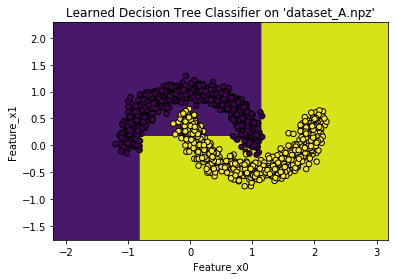

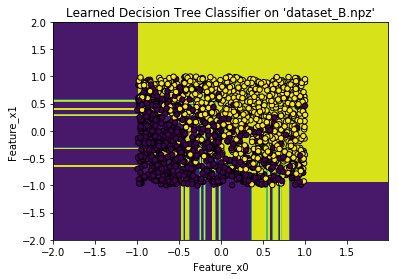

In [4]:
## Codewrite cell: Generate plots of learned decision tree classifier on dataset_A and datasset_B.
# Plots should give both the learned classifier and the train data. 
# Similar to  Bishop Figure 4.5 (with just two classes here.)
# Total number of plots = 2 

with np.load('dataset_A.npz') as data:
    x_train_data_4 = data['arr_0']
    y_train_data_4 = data['arr_1']
    x_test_data_4 = data['arr_2']
    y_test_data_4 = data['arr_3']
myx = x_train_data_4[1:,]
myy = y_train_data_4[1:,]
test_data_x= x_test_data_4[1:,]
test_data_y= y_test_data_4[1:,]
title = "Learned Decision Tree Classifier on \'dataset_A.npz\'"
plot_the_graph(myx,myy,title)


with np.load('dataset_B.npz') as data:
    x_train_data_4 = data['arr_0']
    y_train_data_4 = data['arr_1']
    x_test_data_4 = data['arr_2']
    y_test_data_4 = data['arr_3']
myx = x_train_data_4[1:,]
myy = y_train_data_4[1:,]
test_data_x= x_test_data_4[1:,]
test_data_y= y_test_data_4[1:,]
title = "Learned Decision Tree Classifier on \'dataset_B.npz\'"
plot_the_graph(myx,myy,title)



# 4 Random Forest classifier

Write code for learning RandomForests below. Fix the following hyper parameters: (Fraction of data to learn tree=0.5, Fraction of number of features taken per data=0.5).  Choose the number of trees to add in the forest by using a validation set. (You may use sklearn decision tree function, if you want)

Write code for running in the cell after the nest. (You may be asked to demonstrate your code during the via using this cell.)

In text cell after that report the following numbers you get by running appropriate code:

For each classification data set (A,B,C,D) report the best number of trees found. Report the training and test zero-one error for those hyperparameters.

For the synthetic classification datasets in 2-dimensions (datasets A,B), also illustrate the learned classifier. Do this in the last codeWrite cell for this question.

In [3]:
# CodeWrite cell
# Write Random Forest classifier assuming access to a decision tree learner, 
# write code for choosing best node size to stop splitting.
# write only functions here

np.random.seed(1234)   

def createModel(x_train_data_4,y_train_data_4, maximum_tree):
    
    size = len(x_train_data_4)
    validx = x_train_data_4[0:int(size*.2),]
    validy = y_train_data_4[0:int(size*.2),]
    trainx = x_train_data_4[int(size*.2):size,]
    trainy = y_train_data_4[int(size*.2):size,]

    concatenated_data= np.concatenate((trainx, trainy[np.newaxis].T), axis=1)
    trees = maximum_tree
    best_accuracy = -1

    trainx_length = len(trainx)
    data_size = len(concatenated_data[0])
    concatenated_data = np.array(concatenated_data)
    for tree1 in range(trees):
      
        feature_set = []
        tree_model_list = []
        prediction_for_model = []
        for i in range(tree1+1):
          
            np.random.shuffle(concatenated_data)
            length = len(concatenated_data[0])
            if length == 3 :
                start = 0
                end = 2
            else:
                start = np.asscalar(np.random.randint(int(length/2)-1,size=1))
                end= start+int(length/2)
            startdata=np.asscalar(np.random.randint(int(trainx_length/2)-2,size=1))
            enddata =startdata+int(trainx_length/2)
            x = concatenated_data[startdata:enddata,start:end]   # 0:32 
            y = concatenated_data[startdata:enddata,length-1:length]       
            validationx = validx[:,start:end]
            validationy = validy
            clf = DecisionTreeClassifier()
            model = clf.fit(x,y)
            a =model.predict(validationx)
            feature_set.append((start,end))
            tree_model_list.append(model)
            p = model.predict(validationx)

            prediction_for_model.append(p)
       
        final_prediction = []
        for pred in np.array(prediction_for_model).T:
            count_negative_class =np.array(pred).tolist().count(-1)
            count_positive_class =np.array(pred).tolist().count(1)
            if count_negative_class>count_positive_class:
                final_prediction.append(-1)
            else:
                final_prediction.append(1)

        score = finding_accuracy(validationy, final_prediction)
      
        #print("forest",i,score)
        if(score>best_accuracy):
          
            best_accuracy = score
            best_forest = tree1+1
            best_forest_object = tree_model_list
            best_feature_set = feature_set
    return  best_forest_object, best_feature_set, best_accuracy, best_forest


def prediction(x_test_data_4,best_forest_object, best_feature_set):

    prediction_on_test = []
    for bestTree in range(len(best_forest_object)):
        prediction = best_forest_object[bestTree].predict(x_test_data_4[:,best_feature_set[bestTree][0]:best_feature_set[bestTree][1]])
        prediction_on_test.append(prediction)
    final_prediction1 = []    
    for pred in np.array(prediction_on_test).T:
        count_negative_class =np.array(pred).tolist().count(-1)
        
        count_positive_class =np.array(pred).tolist().count(1)
        if count_negative_class>count_positive_class:
            final_prediction1.append(-1)
        else:
            final_prediction1.append(1)
    return final_prediction1


def finding_accuracy(predicted, true):
    length = len(predicted)
    count = 0
    for c,d in zip(predicted,true):
        if c == d:
            count = count + 1
    return count/(length*1.0)


def plot_the_graph(x_train_data_4,y_train_data_4,best_forest_object,best_feature_set,title):    
    x_min, x_max = x_train_data_4[:, 0].min() - 1, x_train_data_4[:, 0].max() + 1
    y_min, y_max = x_train_data_4[:, 1].min() - 1, x_train_data_4[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    
    Z = np.array(prediction(np.c_[xx.ravel(), yy.ravel()],best_forest_object, best_feature_set))

    h = Z.reshape(xx.shape)
    plt.contourf(xx, yy, h)
    plt.scatter(x_train_data_4[:, 0], x_train_data_4[:, 1], c=y_train_data_4, s=30, edgecolor='k')

    plt.xlabel("Feature_x0")
    plt.ylabel("Feature_x1")
    plt.title(title)
    plt.show()



In [4]:
# CodeWrite cell
# Write code here for generating the numbers that you report below.

max_tree_size = 50

with np.load('dataset_A.npz') as data:
    x_train_data_4 = data['arr_0']
    y_train_data_4 = data['arr_1']
    x_test_data_4 = data['arr_2']
    y_test_data_4 = data['arr_3']

best_forest_object, best_feature_set,best_accuracy,best_forest = createModel(x_train_data_4,y_train_data_4,max_tree_size)
final_prediction= prediction(x_train_data_4,best_forest_object, best_feature_set)
score = finding_accuracy(y_train_data_4, final_prediction)
zero_one_train_error = np.around((1-score)*len(x_train_data_4))

print("dataset_A -->", "best_forest: ",best_forest,"  zero_one_train_error: ",zero_one_train_error)

final_prediction= prediction(x_test_data_4,best_forest_object, best_feature_set)
score = finding_accuracy(y_test_data_4, final_prediction)
zero_one_test_error = np.around((1-score)*len(y_test_data_4))

print("dataset_A -->", "best_forest: ",best_forest,"  zero_one_test_error: ",zero_one_test_error)

with np.load('dataset_B.npz') as data:
    x_train_data_4 = data['arr_0']
    y_train_data_4 = data['arr_1']
    x_test_data_4 = data['arr_2']
    y_test_data_4 = data['arr_3']

best_forest_object, best_feature_set,best_accuracy,best_forest = createModel(x_train_data_4,y_train_data_4,max_tree_size)
final_prediction= prediction(x_train_data_4,best_forest_object, best_feature_set)
score = finding_accuracy(y_train_data_4, final_prediction)
zero_one_train_error = np.around((1-score)*len(x_train_data_4))

print("dataset_B -->", "best_forest: ",best_forest,"  zero_one_train_error: ",zero_one_train_error)

final_prediction= prediction(x_test_data_4,best_forest_object, best_feature_set)
score = finding_accuracy(y_test_data_4, final_prediction)
zero_one_test_error = np.around((1-score)*len(y_test_data_4))

print("dataset_B -->", "best_forest: ",best_forest,"  zero_one_test_error: ",zero_one_test_error)

with np.load('dataset_C.npz') as data:
    x_train_data_4 = data['arr_0']
    y_train_data_4 = data['arr_1']
    x_test_data_4 = data['arr_2']
    y_test_data_4 = data['arr_3']

best_forest_object, best_feature_set,best_accuracy,best_forest = createModel(x_train_data_4,y_train_data_4,max_tree_size)
final_prediction= prediction(x_train_data_4,best_forest_object, best_feature_set)
score = finding_accuracy(y_train_data_4, final_prediction)
zero_one_train_error = np.around((1-score)*len(x_train_data_4))

print("dataset_C -->", "best_forest: ",best_forest,"  zero_one_train_error: ",zero_one_train_error)

final_prediction= prediction(x_test_data_4,best_forest_object, best_feature_set)
score = finding_accuracy(y_test_data_4, final_prediction)
zero_one_test_error = np.around((1-score)*len(y_test_data_4))

print("dataset_C -->", "best_forest: ",best_forest,"  zero_one_test_error: ",zero_one_test_error)

with np.load('dataset_D.npz') as data:
    x_train_data_4 = data['arr_0']
    y_train_data_4 = data['arr_1']
    x_test_data_4 = data['arr_2']
    y_test_data_4 = data['arr_3']

best_forest_object, best_feature_set,best_accuracy,best_forest = createModel(x_train_data_4,y_train_data_4,max_tree_size)
final_prediction= prediction(x_train_data_4,best_forest_object, best_feature_set)
score = finding_accuracy(y_train_data_4, final_prediction)
zero_one_train_error = np.around((1-score)*len(x_train_data_4))

print("dataset_D -->", "best_forest: ",best_forest,"  zero_one_train_error: ",zero_one_train_error)

final_prediction= prediction(x_test_data_4,best_forest_object, best_feature_set)
score = finding_accuracy(y_test_data_4, final_prediction)
zero_one_test_error = np.around((1-score)*len(y_test_data_4))

print("dataset_D -->", "best_forest: ",best_forest,"  zero_one_test_error: ",zero_one_test_error)


dataset_A --> best_forest:  12   zero_one_train_error:  0.0
dataset_A --> best_forest:  12   zero_one_test_error:  3.0
dataset_B --> best_forest:  27   zero_one_train_error:  95.0
dataset_B --> best_forest:  27   zero_one_test_error:  101.0
dataset_C --> best_forest:  48   zero_one_train_error:  11.0
dataset_C --> best_forest:  48   zero_one_test_error:  18.0
dataset_D --> best_forest:  31   zero_one_train_error:  4.0
dataset_D --> best_forest:  31   zero_one_test_error:  5.0


TextWrite cell: Give your observations and the list of hyperparameter choices and train zero-one error  and test zero-one error, for all 4 datasets (2 real world and 2 synthetic).  


#### Train 0-1 Error and Test 0-1 Error using best hyperparameter choice "Number of Trees in Forest" on four Datasets 

|Dataset      |Maximum Size of Forest taken|Best Forest Size         |Train-Error|Test-Error|
|-------------|----------------------------|-------------------------|-----------|----------|
|dataset_A.npz|                 50         |       12                |     0     |   3      |
|dataset_B.npz|                 50         |       27                |     95    |   101    |
|dataset_C.npz|                 50         |       48                |     11    |   18     |
|dataset_D.npz|                 50         |       31                |     4     |   5      |



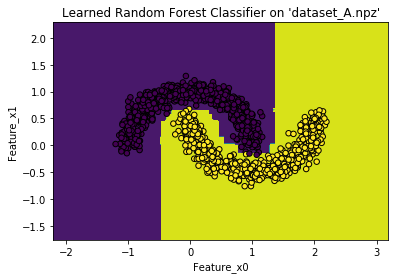

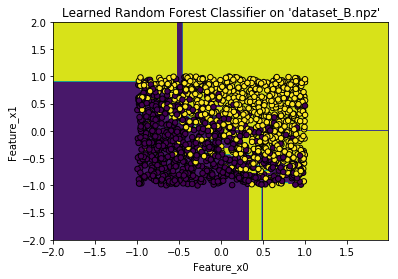

In [6]:
## Codewrite cell: Generate plots of learned Random Forest classifier on dataset_A and datasset_B.
# Plots should give both the learned classifier and the train data. 
# Similar to  Bishop Figure 4.5 (with just two classes here.)
# Total number of plots = 2 

with np.load('dataset_A.npz') as data:
    Ax_train_data_4 = data['arr_0']
    Ay_train_data_4 = data['arr_1']
    Ax_test_data_4 = data['arr_2']
    Ay_test_data_4 = data['arr_3']

Abest_forest_object, Abest_feature_set,_,_ = createModel(Ax_train_data_4,Ay_train_data_4,max_tree_size)
# Afinal_prediction1= prediction(Ax_test_data_4,best_forest_object, best_feature_set)
title = "Learned Random Forest Classifier on \'dataset_A.npz\'"
plot_the_graph(Ax_train_data_4,Ay_train_data_4,Abest_forest_object,Abest_feature_set,title)


with np.load('dataset_B.npz') as data:
    Bx_train_data_4 = data['arr_0']
    By_train_data_4 = data['arr_1']
    Bx_test_data_4 = data['arr_2']
    By_test_data_4 = data['arr_3']

Bbest_forest_object, Bbest_feature_set,_,_ = createModel(Bx_train_data_4,By_train_data_4,max_tree_size)
# Afinal_prediction1= prediction(Ax_test_data_4,best_forest_object, best_feature_set)
title = "Learned Random Forest Classifier on \'dataset_B.npz\'"
plot_the_graph(Bx_train_data_4,By_train_data_4,Bbest_forest_object,Bbest_feature_set,title)
